In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import sklearn.model_selection
import sklearn.linear_model
from sklearn import metrics

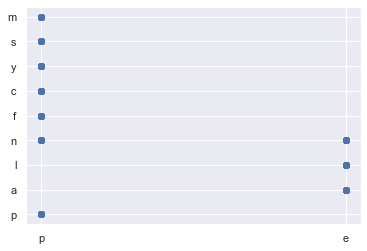

In [70]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

data = pd.read_csv(url, usecols=[0,2,5,9], header=None, names=['edible', 'surface', 'odor','color'])

x = data['edible'].values
y = data['odor'].values
z = data['surface'].values
j = data['color'].values
plt.scatter(x,y)

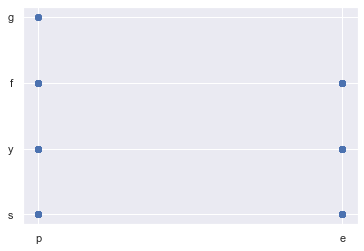

In [71]:
plt.scatter(x,z)

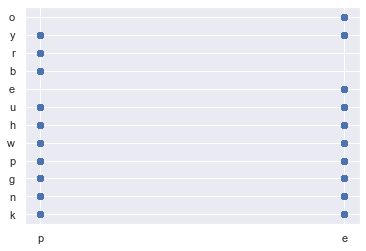

In [72]:
plt.scatter(x,j)

# Graph Analysis

**Looking at the Scatter Plot of the data it is easy to see that the one category that has very little overlap is that of Odor. This helps us visualize the data and recognize that the other categories are present in both the edible and poisonous categories thus making them a poor indicator of whether or not a mushroom can be eaten. We see in the scatter plot between Odor and Edibile that only one odor has both edible and poisonous designations, whereas all other odors indicate poisnous. This simply shows that Odor is avery good way to determine whether a mushroom is poisonous or not.**

In [73]:
data.replace(to_replace={"edible":{'e':0,'p':1}},inplace=True)
data.replace(to_replace={"odor":{'a':0,'l':1,'y':2,'c':3,'s':4,'m':5,'p':6,'n':7,'f':8}}, inplace = True)
data.replace(to_replace={"color":{'n':9,'c':10,'b':11,'r':12,'g':13,'p':14,'e':15,'u':16,'w':17,'y':18,'h':19,'k':20,'o':21}},inplace=True)
data.replace(to_replace={"surface":{'f':22, 'g':23,'y':24,'s':25}}, inplace = True)

In [74]:
o = pd.Series(data["odor"])
o_dummy = pd.get_dummies(o)

co = pd.Series(data["color"])
co_dummy = pd.get_dummies(co)

sf = pd.Series(data["surface"])
sf_dummy = pd.get_dummies(sf)

new_data = pd.concat([o_dummy,co_dummy,sf_dummy,data['edible']],axis=1)

In [75]:
x = new_data.iloc[:, :-1].values
y = new_data.iloc[:, :1].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, random_state=1)

In [76]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
true = [1, 0]
pred = [1, 0]

print(sklearn.metrics.mean_absolute_error(true, pred))
print(sklearn.metrics.mean_squared_error(true, pred))
print(np.sqrt(sklearn.metrics.mean_squared_error(true, pred)))

0.0
0.0
0.0


In [77]:
#The combined categories are very good predictors of edibility

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

3.485493754237733e-15


In [78]:
#Odor alone shows that it, alone, is a better predictor for edibility than all categories combined

X = new_data.iloc[:, 0:9].values
Y = new_data.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

1.1464752758477514e-15


In [79]:
#Color alone is not as good a predictor for edibility as all categories combined or odor alone. In fact, it is a bad predictor in comparison.

X = new_data.iloc[:, 9:22].values
Y = new_data.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.20471940843405823


In [80]:
#Surface alone is not as good a predictor for edibility as all categories combined or odor alone. In fact, it is a bad predictor in comparison. It is slightly better than color alone, however.

X = new_data.iloc[:, 22:26].values
Y = new_data.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



0.2046906026690536


In [81]:
# Excluding odor and leaving all other categories shows that not including odor is a bad predictor of edibility.
X = new_data.iloc[:, 9:26].values
Y = new_data.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.2007210039194366


# Final Analysis

**Accoridng to the analysis, odor is an incredibly strong predictor of edibility. When it is used as the sole predictor, it is more accurate than all of the categories combined. Each individual category outside of odor turns out to be an objectively bad way to predict edibility. When odor is excluded, the accuracy drops dramatically thus showing that odor, whether alone or included, will be the best predictor of whether or not a mushroom is edible.**